In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
import kaggle as kag
from kagglehub import KaggleDatasetAdapter
import kagglehub

In [2]:
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ehsanesmaeili/red-and-white-wine-quality-merged",
  "wine_quality_merged.csv",
)

print("First 5 records:", df.head())

/tmp/ipykernel_36841/3300840266.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 405k/405k [00:00<00:00, 2.80MB/s]

First 5 records:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8     

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
X = df.drop(columns=["quality", "type"])
y = df["quality"]

In [32]:
LE = LabelEncoder()
y = LE.fit_transform(y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
y_pred = model.predict(X_test)

In [36]:
mse = mean_absolute_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(f"MSE : {mse}\nACC : {acc}")

MSE : 0.368
ACC : 0.6664615384615384


In [37]:
dict(sorted(map(lambda x: (x[1], x[0]), zip(model.feature_importances_, model.feature_names_in_)), key=lambda x:x[1]))

{'fixed acidity': np.float64(0.07164595785680611),
 'citric acid': np.float64(0.08028057142174992),
 'pH': np.float64(0.08452244464087784),
 'residual sugar': np.float64(0.08569928406618754),
 'chlorides': np.float64(0.0858310970073291),
 'sulphates': np.float64(0.08599098149308468),
 'free sulfur dioxide': np.float64(0.08629938965442141),
 'total sulfur dioxide': np.float64(0.0884027057719823),
 'volatile acidity': np.float64(0.10202354084734529),
 'density': np.float64(0.10497259122641968),
 'alcohol': np.float64(0.12433143601379609)}

<Axes: xlabel='quality', ylabel='alcohol'>

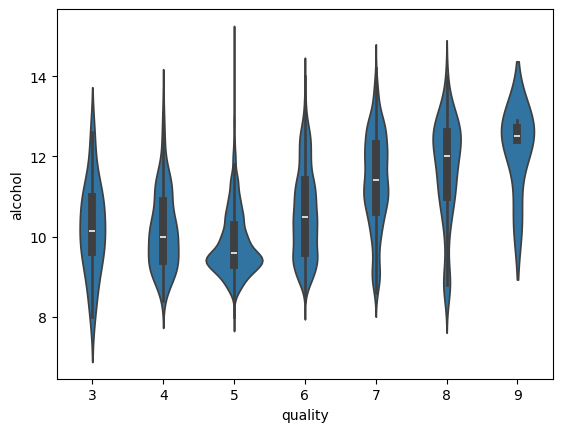

In [41]:
sns.violinplot(x=df["quality"], y=df["alcohol"])